In [86]:
import sys

sys.path.append('..')

from flod.classifiers.bsvclassifier import BSVClassifier

In [87]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer, confusion_matrix, accuracy_score
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
import numpy as np

plt.rcParams["figure.figsize"] = (15, 6)

In [88]:
from joblib import dump, load
clf = load('iris.joblib')

X = clf.X_
y = clf.y_
y_test = clf.y_
y_pred = clf.predict(clf.X_)

print(f'Precision {precision_score(y_test, y_pred)}')
print(f'Recall {recall_score(y_test, y_pred)}')
print(f'F1 {f1_score(y_test, y_pred)}')
print(f'Accuracy {accuracy_score(y_test, y_pred)}')

Precision 0.494949494949495
Recall 0.98
F1 0.6577181208053691
Accuracy 0.49


/Users/maxfrax/opt/anaconda3/envs/python3_7/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: No contour levels were found within the data range.
  


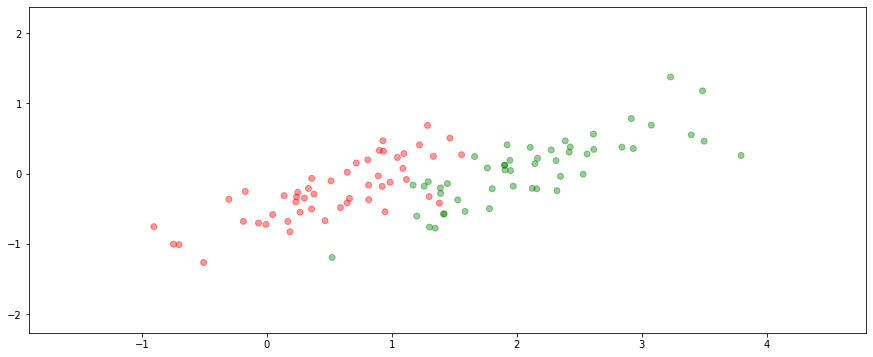

In [89]:
colors = ['green' if i == 0 else 'red' for i in y]

gx = np.linspace(min(X[:,0])-1, max(X[:,0])+1, 50)
gy = np.linspace(min(X[:,1])-1, max(X[:,1])+1, 50)
gX, gY = np.meshgrid(gx, gy)
zs = np.array([clf._compute_r(np.array([x, y])) for x, y in zip(np.ravel(gX), np.ravel(gY))])
gZ = zs.reshape(gX.shape)
membership_contour = plt.contour(gX, gY, gZ, levels=(clf.radiuses_[clf.sv_i], ))
plt.clabel(membership_contour, inline=1)

plt.scatter(X[:, 0], X[:, 1], c=colors, alpha=.4)

plt.show()

In [90]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=[0,1]).ravel()

print(f'TP: {tp} FP: {fp} FN: {fn} TN: {tn}')

TP: 49 FP: 50 FN: 1 TN: 0


In [91]:
outliers_ix = [i for i, y in enumerate(clf.y_) if y == 1]

Qui sotto possiamo vedere la distribuzione dei valori di beta. Le beta degli outlier dovrebbero essere sovrapposte ai punti rappresentanti c.
Inoltre il support vector dovrebbe trovarsi abbastanza vicino alla parte centrale del grafico.

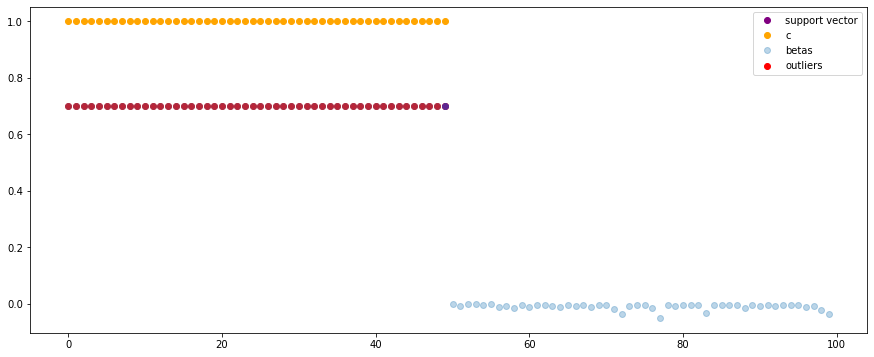

In [92]:
plt.plot(clf.sv_i, clf.betas_[clf.sv_i], 'o', c='purple', label = 'support vector', alpha=1)
plt.plot(outliers_ix, [clf.c]*len(outliers_ix), 'o', c='orange', label = 'c', alpha=1)
plt.scatter(outliers_ix, [clf.betas_[i] for i in outliers_ix], c='red', label='outliers', alpha=1)
plt.plot(clf.betas_, 'o', alpha=.3, label='betas')
plt.legend()
plt.show()

In [93]:
print(f'Sum betas {sum(clf.betas_)} Negative betas {len([1 for b in clf.betas_ if b < 0])}')

Sum betas 34.549356239257655 Negative betas 50


I raggi degli outlier dovrebbero essere tutti chiaramente sopra a quelli del support vector. Inoltre gli altri dovrebbero essere simili o chiaramente sotto

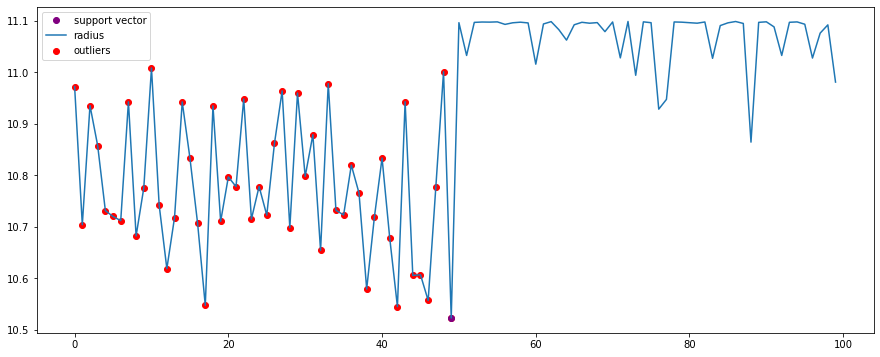

In [94]:
plt.plot(clf.sv_i, clf.radiuses_[clf.sv_i], 'o', c='purple', label = 'support vector', alpha=1)
plt.scatter(outliers_ix, [clf.radiuses_[i] for i in outliers_ix], c='red', label='outliers', alpha=1)
plt.plot(clf.radiuses_, label='radius')
plt.legend()
plt.show()